In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('[...PATH...]/httparchive_processed/2020-01/agg-summaries.db')
try:
    bp_df = pd.read_sql('''
                           select  base_page, bp_cdn, num_cdn, cdn_assets, non_cdn_assets, assets_total, cdn_pen
                           from    base_pages_detailed
                        ''',
                        con=conn)

except Exception as e:
    print(e)
finally:
    conn.close()

In [3]:
conn = sqlite3.connect('[...PATH...]/httparchive_processed/2020-01/basepages.db')
try:
    bp_df_2 = pd.read_sql('''
                             select  base_page,
                                     load_time,
                                     ttfb,
                                     visual_complete, visualComplete85, visualComplete90, visualComplete95,
                                     dom_interactive,
                                     first_contentful_paint, first_meaningful_paint
                             from    base_pages
                          ''',
                          con=conn)
except Exception as e:
    print(e)
finally:
    conn.close()

In [4]:
bp_df

,base_page,bp_cdn,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen
0,https://www.thejamesroom.com/,None,4.0,45.0,3.0,48.0,0.937500
1,https://staszow.geoportal2.pl/,None,0.0,0.0,11.0,11.0,0.000000
2,http://trustypick.com/,None,1.0,2.0,30.0,32.0,0.062500
3,https://www.honorstransfercouncil.org/,None,3.0,98.0,2.0,100.0,0.980000
4,http://www.expedia.com.sg/,Akamai,7.0,243.0,3.0,246.0,0.987805
...,...,...,...,...,...,...,...
4278621,https://www.townofbreckenridge.com/,Akamai,5.0,68.0,1.0,69.0,0.985507
4278622,http://gong-yoo.jp/,None,3.0,44.0,19.0,63.0,0.698413
4278623,https://macrium-reflect-free.br.uptodown.com/,Akamai,3.0,50.0,6.0,56.0,0.892857
4278624,https://apps.deadiversion.usdoj.gov/,None,5.0,10.0,42.0,52.0,0.192308


In [5]:
bp_df_2

,base_page,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
0,https://www.thejamesroom.com/,63811,420,5700,5700,5700,5700,2259,2108,2524
1,https://staszow.geoportal2.pl/,2156,917,2200,1800,2000,2200,328,1293,1293
2,http://trustypick.com/,4644,2495,4700,4700,4700,4700,3421,3572,3572
3,https://www.honorstransfercouncil.org/,6640,376,6600,6600,6600,6600,1579,1278,2876
4,http://www.expedia.com.sg/,9174,588,5400,5400,5400,5400,3106,1073,1148
...,...,...,...,...,...,...,...,...,...,...
4278642,https://www.townofbreckenridge.com/,8557,68,9100,9100,9100,9100,2218,1897,2553
4278643,http://gong-yoo.jp/,9324,1188,6800,6800,6800,6800,2896,3493,4328
4278644,https://macrium-reflect-free.br.uptodown.com/,2966,1207,5200,2700,2700,5100,2129,1638,1869
4278645,https://apps.deadiversion.usdoj.gov/,6326,682,6400,4900,5100,5100,2115,2753,2878


In [6]:
df = bp_df.merge(bp_df_2, on='base_page')

In [7]:
df

,base_page,bp_cdn,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
0,https://www.thejamesroom.com/,None,4.0,45.0,3.0,48.0,0.937500,63811,420,5700,5700,5700,5700,2259,2108,2524
1,https://staszow.geoportal2.pl/,None,0.0,0.0,11.0,11.0,0.000000,2156,917,2200,1800,2000,2200,328,1293,1293
2,http://trustypick.com/,None,1.0,2.0,30.0,32.0,0.062500,4644,2495,4700,4700,4700,4700,3421,3572,3572
3,https://www.honorstransfercouncil.org/,None,3.0,98.0,2.0,100.0,0.980000,6640,376,6600,6600,6600,6600,1579,1278,2876
4,http://www.expedia.com.sg/,Akamai,7.0,243.0,3.0,246.0,0.987805,9174,588,5400,5400,5400,5400,3106,1073,1148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278642,https://www.townofbreckenridge.com/,Akamai,5.0,68.0,1.0,69.0,0.985507,8557,68,9100,9100,9100,9100,2218,1897,2553
4278643,http://gong-yoo.jp/,None,3.0,44.0,19.0,63.0,0.698413,9324,1188,6800,6800,6800,6800,2896,3493,4328
4278644,https://macrium-reflect-free.br.uptodown.com/,Akamai,3.0,50.0,6.0,56.0,0.892857,2966,1207,5200,2700,2700,5100,2129,1638,1869
4278645,https://apps.deadiversion.usdoj.gov/,None,5.0,10.0,42.0,52.0,0.192308,6326,682,6400,4900,5100,5100,2115,2753,2878


In [8]:
df['bp_cdn'].unique()

array([None, 'Akamai', 'Cloudflare', 'Fastly', 'Amazon', 'Netlify',
       'Google', 'Microsoft', 'Rackspace', 'LeaseWeb CDN', 'AT&T',
       'OVH CDN', 'Level3', 'Yahoo', 'Sucuri Firewall', 'Incapsula',
       'Yottaa', 'WordPress', 'Zenedge', 'Highwinds', 'ChinaCache',
       'Taobao', 'section.io', 'Reflected Networks', 'Internap',
       'Edgecast', 'CDNetworks', 'CDN', 'KINX CDN', 'GoCache', 'SFR',
       'Yunjiasu', 'Limelight', 'Azion', 'Telenor', 'Myra Security CDN',
       'ChinaNetCenter', 'CDN77', 'Cedexis', 'NetDNA', 'Aryaka', 'NGENIX',
       'Level 3', 'Facebook', 'XLabs Security', 'BelugaCDN', 'CDNvideo',
       'BunnyCDN', 'KeyCDN', 'BitGravity', 'Fly', 'Instart Logic',
       'StackPath', 'Airee', 'QUIC.cloud', 'OnApp', 'Optimal CDN',
       'Twitter', 'BO.LT', 'Rocket CDN', 'Singular CDN', 'Medianova',
       'SwiftCDN', 'Rev Software', 'Bison Grid', 'Ananke',
       'Universal CDN', 'NYI FTW', 'cubeCDN', 'Zycada Networks',
       'Roast.io', 'Cachefly', 'TRBCDN', 'Ca

In [9]:
df.columns

Index(['base_page', 'bp_cdn', 'num_cdn', 'cdn_assets', 'non_cdn_assets',
       'assets_total', 'cdn_pen', 'load_time', 'ttfb', 'visual_complete',
       'visualComplete85', 'visualComplete90', 'visualComplete95',
       'dom_interactive', 'first_contentful_paint', 'first_meaningful_paint'],
      dtype='object')

In [10]:
cols = ['load_time', 'ttfb', 'visual_complete',
       'visualComplete85', 'visualComplete90', 'visualComplete95',
       'dom_interactive', 'first_contentful_paint', 'first_meaningful_paint']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [11]:
df.dtypes

base_page                  object
bp_cdn                     object
num_cdn                   float64
cdn_assets                float64
non_cdn_assets            float64
assets_total              float64
cdn_pen                   float64
load_time                   int64
ttfb                        int64
visual_complete             int64
visualComplete85            int64
visualComplete90            int64
visualComplete95            int64
dom_interactive             int64
first_contentful_paint      int64
first_meaningful_paint      int64
dtype: object

In [12]:
df = df[df[cols].gt(0).all(1)]  # only consider pages with valid values

In [13]:
df

,base_page,bp_cdn,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
0,https://www.thejamesroom.com/,None,4.0,45.0,3.0,48.0,0.937500,63811,420,5700,5700,5700,5700,2259,2108,2524
1,https://staszow.geoportal2.pl/,None,0.0,0.0,11.0,11.0,0.000000,2156,917,2200,1800,2000,2200,328,1293,1293
2,http://trustypick.com/,None,1.0,2.0,30.0,32.0,0.062500,4644,2495,4700,4700,4700,4700,3421,3572,3572
3,https://www.honorstransfercouncil.org/,None,3.0,98.0,2.0,100.0,0.980000,6640,376,6600,6600,6600,6600,1579,1278,2876
4,http://www.expedia.com.sg/,Akamai,7.0,243.0,3.0,246.0,0.987805,9174,588,5400,5400,5400,5400,3106,1073,1148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278641,http://www.testevocacional.org/,None,1.0,17.0,8.0,25.0,0.680000,6506,5184,6500,6000,6000,6000,5380,5421,5421
4278642,https://www.townofbreckenridge.com/,Akamai,5.0,68.0,1.0,69.0,0.985507,8557,68,9100,9100,9100,9100,2218,1897,2553
4278643,http://gong-yoo.jp/,None,3.0,44.0,19.0,63.0,0.698413,9324,1188,6800,6800,6800,6800,2896,3493,4328
4278644,https://macrium-reflect-free.br.uptodown.com/,Akamai,3.0,50.0,6.0,56.0,0.892857,2966,1207,5200,2700,2700,5100,2129,1638,1869


In [14]:
# full correlation matrix
df.corr()

,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
num_cdn,1.000000,0.650404,0.014785,0.540700,0.484928,0.149802,-0.028707,0.165287,0.105218,0.117370,0.132416,0.046076,-0.011804,0.041963
cdn_assets,0.650404,1.000000,-0.052957,0.784308,0.554841,0.216985,-0.037298,0.219569,0.136607,0.153798,0.175198,0.052818,-0.015814,0.040598
non_cdn_assets,0.014785,-0.052957,1.000000,0.577966,-0.533170,0.343792,0.128422,0.316979,0.254798,0.267236,0.282448,0.230321,0.180895,0.198722
assets_total,0.540700,0.784308,0.577966,1.000000,0.122192,0.390900,0.049301,0.376354,0.269928,0.291703,0.318642,0.186249,0.099456,0.156632
cdn_pen,0.484928,0.554841,-0.533170,0.122192,1.000000,-0.055993,-0.113391,-0.046177,-0.062246,-0.059685,-0.055769,-0.106175,-0.127786,-0.091972
load_time,0.149802,0.216985,0.343792,0.390900,-0.055993,1.000000,0.274503,0.775558,0.643006,0.668943,0.699926,0.489092,0.392531,0.433968
ttfb,-0.028707,-0.037298,0.128422,0.049301,-0.113391,0.274503,1.000000,0.309160,0.377044,0.360704,0.343988,0.597421,0.729792,0.673098
visual_complete,0.165287,0.219569,0.316979,0.376354,-0.046177,0.775558,0.309160,1.000000,0.802499,0.840757,0.886046,0.503064,0.437221,0.477951
visualComplete85,0.105218,0.136607,0.254798,0.269928,-0.062246,0.643006,0.377044,0.802499,1.000000,0.960966,0.914018,0.537018,0.521930,0.550620
visualComplete90,0.117370,0.153798,0.267236,0.291703,-0.059685,0.668943,0.360704,0.840757,0.960966,1.000000,0.955533,0.525385,0.500962,0.532669


In [15]:
df_none = df[df['bp_cdn'].isna()]

In [16]:
df_none

,base_page,bp_cdn,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
0,https://www.thejamesroom.com/,None,4.0,45.0,3.0,48.0,0.937500,63811,420,5700,5700,5700,5700,2259,2108,2524
1,https://staszow.geoportal2.pl/,None,0.0,0.0,11.0,11.0,0.000000,2156,917,2200,1800,2000,2200,328,1293,1293
2,http://trustypick.com/,None,1.0,2.0,30.0,32.0,0.062500,4644,2495,4700,4700,4700,4700,3421,3572,3572
3,https://www.honorstransfercouncil.org/,None,3.0,98.0,2.0,100.0,0.980000,6640,376,6600,6600,6600,6600,1579,1278,2876
6,http://ge.ssec.wisc.edu/,None,0.0,0.0,17.0,17.0,0.000000,842,399,900,800,800,800,547,636,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278638,http://attelagepeda.info/,None,1.0,2.0,26.0,28.0,0.071429,1665,457,1700,1200,1200,1400,703,803,803
4278639,https://feedusback.dominos.co.uk/,None,0.0,0.0,17.0,17.0,0.000000,1316,119,1300,1300,1300,1300,1104,1156,1156
4278641,http://www.testevocacional.org/,None,1.0,17.0,8.0,25.0,0.680000,6506,5184,6500,6000,6000,6000,5380,5421,5421
4278643,http://gong-yoo.jp/,None,3.0,44.0,19.0,63.0,0.698413,9324,1188,6800,6800,6800,6800,2896,3493,4328


In [17]:
df_cdn = df[~df['bp_cdn'].isna()]

In [18]:
df_cdn

,base_page,bp_cdn,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
4,http://www.expedia.com.sg/,Akamai,7.0,243.0,3.0,246.0,0.987805,9174,588,5400,5400,5400,5400,3106,1073,1148
5,https://ludusmanila.com/,Cloudflare,4.0,26.0,0.0,26.0,1.000000,1862,569,2100,1700,1700,1700,1423,1037,1519
7,https://www.stadtwerke-sommerkino.de/,Fastly,2.0,11.0,0.0,11.0,1.000000,3972,1144,3800,3800,3800,3800,3416,1346,4081
13,https://editmp3.online/,Cloudflare,6.0,118.0,6.0,124.0,0.951613,11893,1059,8000,1800,2800,3600,3051,1595,2796
14,https://www.toyotacertifiedcenterofsantee.com/,Amazon,7.0,50.0,1.0,51.0,0.980392,2424,498,5100,2500,4900,4900,1040,1034,1582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278636,https://foodnetworkcom.list-integration.whisk....,Google,3.0,49.0,0.0,49.0,1.000000,2792,586,6800,2200,6800,6800,946,2140,2140
4278637,https://stsps.typingclub.com/,Amazon,4.0,39.0,0.0,39.0,1.000000,4577,469,4600,4500,4600,4600,3377,4338,4556
4278640,https://agencepro.orange.fr/,Amazon,6.0,61.0,25.0,86.0,0.709302,6057,911,5800,4300,4300,4300,2702,2686,3801
4278642,https://www.townofbreckenridge.com/,Akamai,5.0,68.0,1.0,69.0,0.985507,8557,68,9100,9100,9100,9100,2218,1897,2553


In [19]:
df_cdn['cdn_pen'].median()

0.9921259842519685

In [20]:
df_none['cdn_pen'].median()

0.2765957446808511

In [21]:
df_cdn.corr()

,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
num_cdn,1.000000,0.584747,0.412064,0.602175,-0.200812,0.197106,-0.011714,0.234060,0.152973,0.169603,0.190543,0.082987,0.018222,0.072476
cdn_assets,0.584747,1.000000,0.486976,0.979055,-0.125849,0.376619,0.024872,0.387829,0.274529,0.300246,0.330030,0.174166,0.070791,0.136831
non_cdn_assets,0.412064,0.486976,1.000000,0.654600,-0.659677,0.189501,-0.004635,0.174128,0.068536,0.092446,0.122283,0.055634,0.005730,0.017496
assets_total,0.602175,0.979055,0.654600,1.000000,-0.262700,0.370151,0.020448,0.376271,0.253592,0.281424,0.314158,0.163716,0.062608,0.122511
cdn_pen,-0.200812,-0.125849,-0.659677,-0.262700,1.000000,-0.080550,-0.015737,-0.064096,-0.012472,-0.022310,-0.036651,-0.041346,-0.022078,-0.018401
load_time,0.197106,0.376619,0.189501,0.370151,-0.080550,1.000000,0.249737,0.735728,0.606821,0.632961,0.664543,0.446678,0.345910,0.393914
ttfb,-0.011714,0.024872,-0.004635,0.020448,-0.015737,0.249737,1.000000,0.285273,0.361240,0.343096,0.324018,0.604933,0.733012,0.665853
visual_complete,0.234060,0.387829,0.174128,0.376271,-0.064096,0.735728,0.285273,1.000000,0.784534,0.825836,0.876189,0.455859,0.392402,0.441270
visualComplete85,0.152973,0.274529,0.068536,0.253592,-0.012472,0.606821,0.361240,0.784534,1.000000,0.957424,0.905399,0.494416,0.487366,0.520083
visualComplete90,0.169603,0.300246,0.092446,0.281424,-0.022310,0.632961,0.343096,0.825836,0.957424,1.000000,0.950414,0.479629,0.463919,0.500454


In [22]:
df_none.corr()

,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
num_cdn,1.000000,0.617273,0.173307,0.514437,0.536715,0.173942,0.018060,0.177599,0.130310,0.140225,0.151849,0.085495,0.035202,0.082250
cdn_assets,0.617273,1.000000,0.122933,0.723641,0.631154,0.215240,0.001052,0.207922,0.138114,0.151875,0.169623,0.069349,0.019501,0.064500
non_cdn_assets,0.173307,0.122933,1.000000,0.773901,-0.303216,0.401391,0.110311,0.370701,0.293504,0.308062,0.326343,0.243523,0.174773,0.211860
assets_total,0.514437,0.723641,0.773901,1.000000,0.191898,0.416503,0.077387,0.390489,0.292255,0.311161,0.335200,0.213614,0.133990,0.188499
cdn_pen,0.536715,0.631154,-0.303216,0.191898,1.000000,-0.010312,-0.054793,-0.002037,-0.016743,-0.014064,-0.010073,-0.054863,-0.068928,-0.034974
load_time,0.173942,0.215240,0.401391,0.416503,-0.010312,1.000000,0.278021,0.789359,0.654382,0.680454,0.711497,0.500831,0.404983,0.445149
ttfb,0.018060,0.001052,0.110311,0.077387,-0.054793,0.278021,1.000000,0.313390,0.377038,0.361469,0.345909,0.589492,0.724038,0.671395
visual_complete,0.177599,0.207922,0.370701,0.390489,-0.002037,0.789359,0.313390,1.000000,0.808267,0.845598,0.889235,0.517100,0.450223,0.488742
visualComplete85,0.130310,0.138114,0.293504,0.292255,-0.016743,0.654382,0.377038,0.808267,1.000000,0.962017,0.916692,0.548101,0.530113,0.558260
visualComplete90,0.140225,0.151875,0.308062,0.311161,-0.014064,0.680454,0.361469,0.845598,0.962017,1.000000,0.957165,0.537702,0.510093,0.540981


In [45]:
cols = ['load_time', 'ttfb', 'visual_complete',
       'visualComplete85', 'visualComplete90', 'visualComplete95',
       'dom_interactive', 'first_contentful_paint', 'first_meaningful_paint']

In [46]:
pen_cols = ['cdn_pen'] + cols

In [48]:
df_cdn[pen_cols].corr()

,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
cdn_pen,1.000000,-0.080550,-0.015737,-0.064096,-0.012472,-0.022310,-0.036651,-0.041346,-0.022078,-0.018401
load_time,-0.080550,1.000000,0.249737,0.735728,0.606821,0.632961,0.664543,0.446678,0.345910,0.393914
ttfb,-0.015737,0.249737,1.000000,0.285273,0.361240,0.343096,0.324018,0.604933,0.733012,0.665853
visual_complete,-0.064096,0.735728,0.285273,1.000000,0.784534,0.825836,0.876189,0.455859,0.392402,0.441270
visualComplete85,-0.012472,0.606821,0.361240,0.784534,1.000000,0.957424,0.905399,0.494416,0.487366,0.520083
visualComplete90,-0.022310,0.632961,0.343096,0.825836,0.957424,1.000000,0.950414,0.479629,0.463919,0.500454
visualComplete95,-0.036651,0.664543,0.324018,0.876189,0.905399,0.950414,1.000000,0.469164,0.439971,0.481298
dom_interactive,-0.041346,0.446678,0.604933,0.455859,0.494416,0.479629,0.469164,1.000000,0.736255,0.734400
first_contentful_paint,-0.022078,0.345910,0.733012,0.392402,0.487366,0.463919,0.439971,0.736255,1.000000,0.908200
first_meaningful_paint,-0.018401,0.393914,0.665853,0.441270,0.520083,0.500454,0.481298,0.734400,0.908200,1.000000


In [49]:
df_none[pen_cols].corr()

,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
cdn_pen,1.000000,-0.010312,-0.054793,-0.002037,-0.016743,-0.014064,-0.010073,-0.054863,-0.068928,-0.034974
load_time,-0.010312,1.000000,0.278021,0.789359,0.654382,0.680454,0.711497,0.500831,0.404983,0.445149
ttfb,-0.054793,0.278021,1.000000,0.313390,0.377038,0.361469,0.345909,0.589492,0.724038,0.671395
visual_complete,-0.002037,0.789359,0.313390,1.000000,0.808267,0.845598,0.889235,0.517100,0.450223,0.488742
visualComplete85,-0.016743,0.654382,0.377038,0.808267,1.000000,0.962017,0.916692,0.548101,0.530113,0.558260
visualComplete90,-0.014064,0.680454,0.361469,0.845598,0.962017,1.000000,0.957165,0.537702,0.510093,0.540981
visualComplete95,-0.010073,0.711497,0.345909,0.889235,0.916692,0.957165,1.000000,0.530290,0.490589,0.524609
dom_interactive,-0.054863,0.500831,0.589492,0.517100,0.548101,0.537702,0.530290,1.000000,0.758761,0.754190
first_contentful_paint,-0.068928,0.404983,0.724038,0.450223,0.530113,0.510093,0.490589,0.758761,1.000000,0.929045
first_meaningful_paint,-0.034974,0.445149,0.671395,0.488742,0.558260,0.540981,0.524609,0.754190,0.929045,1.000000


In [52]:
df_none[pen_cols].corr()['cdn_pen'].sort_values()

first_contentful_paint   -0.068928
dom_interactive          -0.054863
ttfb                     -0.054793
first_meaningful_paint   -0.034974
visualComplete85         -0.016743
visualComplete90         -0.014064
load_time                -0.010312
visualComplete95         -0.010073
visual_complete          -0.002037
cdn_pen                   1.000000
Name: cdn_pen, dtype: float64

In [23]:
df_cdn.describe().round(3)

,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
count,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000,1270731.000
mean,5.054,93.717,7.091,100.808,0.953,8214.567,966.247,7536.358,5437.714,5811.403,6278.866,2991.223,2341.196,3018.570
std,2.887,77.739,20.936,89.816,0.099,9036.675,1735.404,7703.014,5823.262,6191.983,6623.495,3231.214,2586.560,2888.865
min,1.000,0.000,0.000,0.000,0.000,152.000,8.000,200.000,200.000,200.000,200.000,38.000,73.000,73.000
25%,3.000,44.000,0.000,46.000,0.950,3644.500,414.000,3200.000,2300.000,2400.000,2600.000,1598.000,1286.000,1655.000
50%,5.000,75.000,1.000,78.000,0.992,5800.000,659.000,5500.000,3800.000,4000.000,4400.000,2347.000,1825.000,2434.000
75%,7.000,121.000,5.000,127.000,1.000,9285.000,1088.000,9300.000,6500.000,7000.000,7700.000,3476.000,2685.000,3630.000
max,23.000,5773.000,2111.000,5789.000,1.000,120052.000,117282.000,156700.000,120500.000,120500.000,120500.000,119959.000,119846.000,119125.000


In [24]:
df_none.describe().round(3)

,num_cdn,cdn_assets,non_cdn_assets,assets_total,cdn_pen,load_time,ttfb,visual_complete,visualComplete85,visualComplete90,visualComplete95,dom_interactive,first_contentful_paint,first_meaningful_paint
count,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000,2757885.000
mean,3.046,33.212,54.833,88.044,0.334,9408.307,1403.283,8455.646,6358.955,6752.853,7223.149,3740.593,3049.514,3641.010
std,2.435,47.152,51.386,73.889,0.267,10104.625,1945.647,8613.439,6590.568,6989.795,7440.735,3819.973,2928.100,3203.477
min,0.000,0.000,0.000,0.000,0.000,157.000,10.000,200.000,200.000,200.000,200.000,43.000,177.000,177.000
25%,1.000,6.000,23.000,42.000,0.118,4134.000,641.000,3600.000,2800.000,2900.000,3100.000,2003.000,1747.000,2061.000
50%,2.000,18.000,44.000,72.000,0.277,6650.000,1049.000,6100.000,4500.000,4700.000,5100.000,2964.000,2501.000,3039.000
75%,4.000,42.000,72.000,114.000,0.500,10816.000,1640.000,10300.000,7600.000,8200.000,8800.000,4391.000,3568.000,4397.000
max,22.000,5561.000,4186.000,5568.000,1.000,120741.000,117936.000,121000.000,120900.000,120900.000,121000.000,119672.000,119953.000,119926.000


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [26]:
from scipy.stats import levene

In [28]:
df_cdn['cdn_pen'].var()

0.009743033488525617

In [29]:
df_none['cdn_pen'].var()

0.071268679526289

In [31]:
for col in cols:
    print(col, levene(np.log(df_cdn[col]), np.log(df_none[col])))

load_time LeveneResult(statistic=1155.0661677530422, pvalue=3.862266786335683e-253)
ttfb LeveneResult(statistic=172.17903085229392, pvalue=2.477820864591879e-39)
visual_complete LeveneResult(statistic=246.33778379678412, pvalue=1.63873074943235e-55)
visualComplete85 LeveneResult(statistic=329.17760140045664, pvalue=1.4616567820208427e-73)
visualComplete90 LeveneResult(statistic=202.25858414497995, pvalue=6.731085612925782e-46)
visualComplete95 LeveneResult(statistic=65.37895583216196, pvalue=6.18121503505499e-16)
dom_interactive LeveneResult(statistic=1885.305297578658, pvalue=0.0)
first_contentful_paint LeveneResult(statistic=241.91989403606996, pvalue=1.5054972763600293e-54)
first_meaningful_paint LeveneResult(statistic=22.703272195810154, pvalue=1.890522421819237e-06)


load_time Ttest_indResult(statistic=-152.2735244572972, pvalue=0.0)
ttfb Ttest_indResult(statistic=-485.4391162248529, pvalue=0.0)
visual_complete Ttest_indResult(statistic=-126.73282778669493, pvalue=0.0)
visualComplete85 Ttest_indResult(statistic=-197.0015078165734, pvalue=0.0)
visualComplete90 Ttest_indResult(statistic=-185.61641001832658, pvalue=0.0)
visualComplete95 Ttest_indResult(statistic=-169.55384530143468, pvalue=0.0)
dom_interactive Ttest_indResult(statistic=-304.064003334395, pvalue=0.0)
first_contentful_paint Ttest_indResult(statistic=-423.7188969946375, pvalue=0.0)
first_meaningful_paint Ttest_indResult(statistic=-291.44621385513994, pvalue=0.0)


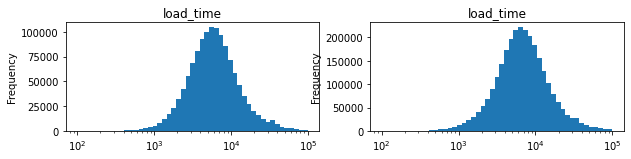

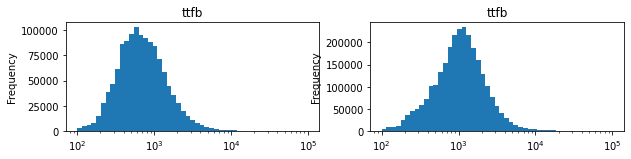

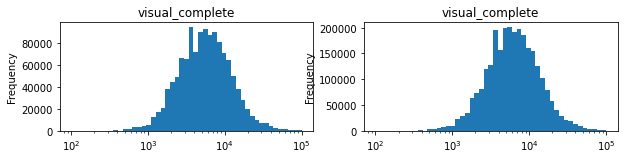

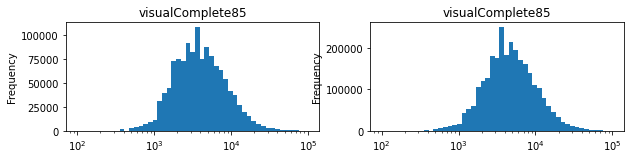

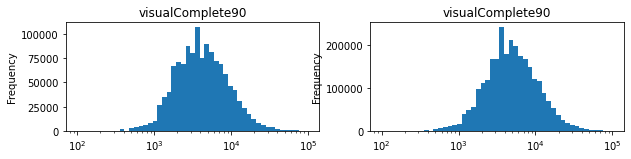

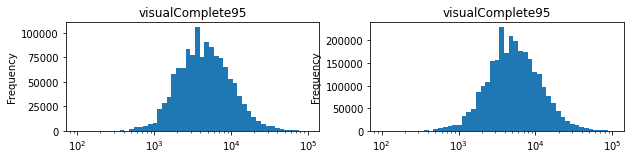

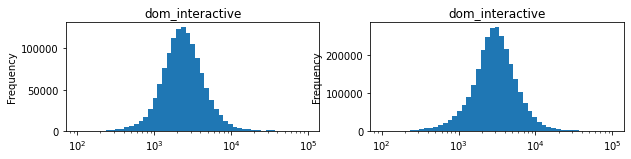

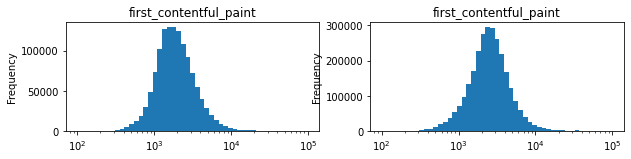

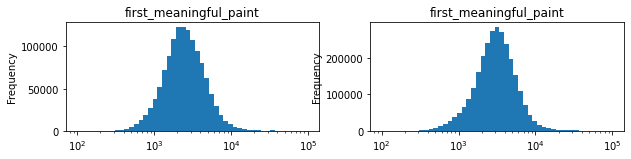

In [33]:
# Loop; NOTE: consider cumulative error, e.g., Bonferroni correction
for col in cols:
    print(col, ttest_ind(np.log(df_cdn[col]), np.log(df_none[col]), equal_var=False))
    fig, (ax1, ax2) = plt.subplots(figsize=(10,2), ncols=2)
    df_cdn[col].plot.hist(ax=ax1, bins=np.logspace(2, 5))
    df_none[col].plot.hist(ax=ax2, bins=np.logspace(2, 5))
    ax1.set_xscale('log')
    ax1.set_title(col)
    ax2.set_xscale('log')
    ax2.set_title(col)
    fig.show()